In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats


warnings.filterwarnings('ignore')
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from blinkit_sales_summary",conn)

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,5000.0,5.099749e+05,2.936783e+05,4452.000000,2.577190e+05,5.406180e+05,7.478010e+05,9.933310e+05
order_id,5000.0,5.029129e+09,2.863533e+09,60465.000000,2.531421e+09,5.074378e+09,7.488579e+09,9.998298e+09
customer_id,5000.0,5.009685e+07,2.919082e+07,31813.000000,2.404314e+07,4.997808e+07,7.621215e+07,9.989390e+07
quantity,5000.0,2.006800e+00,8.205415e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
order_total,5000.0,2.201862e+03,1.303024e+03,13.250000,1.086215e+03,2.100690e+03,3.156883e+03,6.721460e+03
mrp,5000.0,6.859123e+02,4.182324e+02,17.600000,3.262900e+02,6.438200e+02,1.061660e+03,1.633320e+03
price,5000.0,4.931579e+02,2.980756e+02,12.320000,2.272200e+02,4.481600e+02,7.810800e+02,9.959800e+02
rating,5000.0,3.344400e+00,1.189820e+00,1.000000,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
total_orders,5000.0,1.048220e+01,5.802553e+00,1.000000,6.000000e+00,1.000000e+01,1.600000e+01,2.000000e+01
avg_order_value,5000.0,1.092335e+03,5.230641e+02,200.430000,6.144800e+02,1.114500e+03,1.546233e+03,1.999830e+03


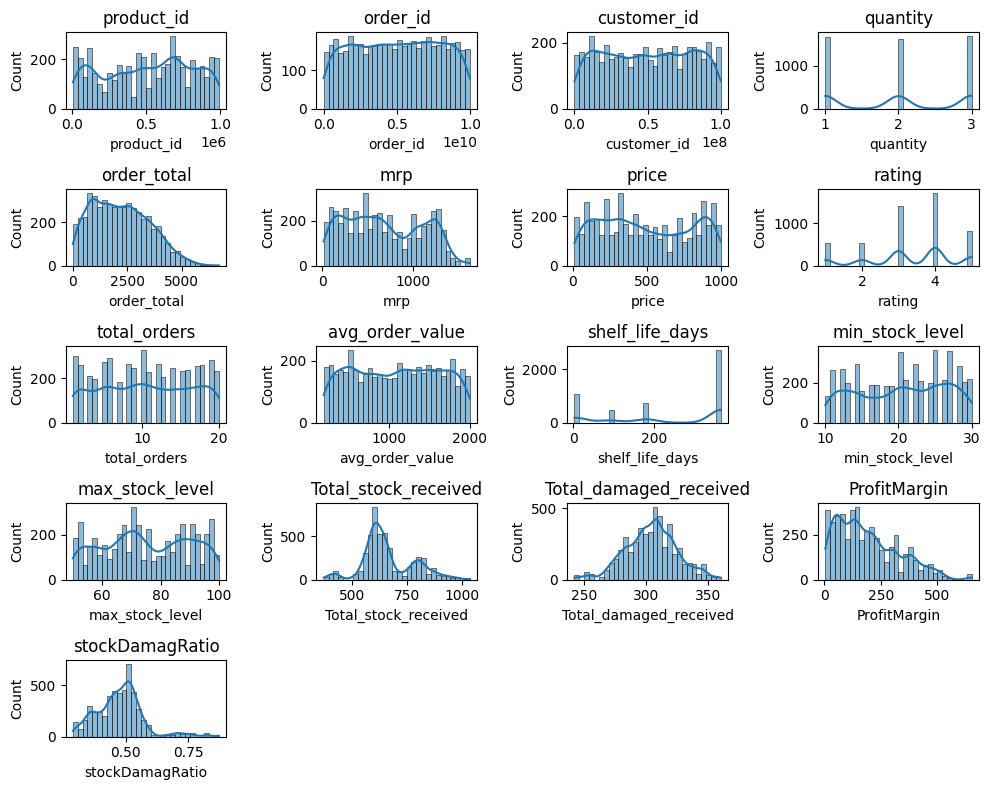

In [3]:
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10,8))
for i, col in enumerate(numerical_col):
    plt.subplot(5,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


In [4]:
# df=pd.read_sql_query("select * from blinkit_sales_summary WHERE rating>1 AND Total_stock_received>600",conn)
# df

<Axes: >

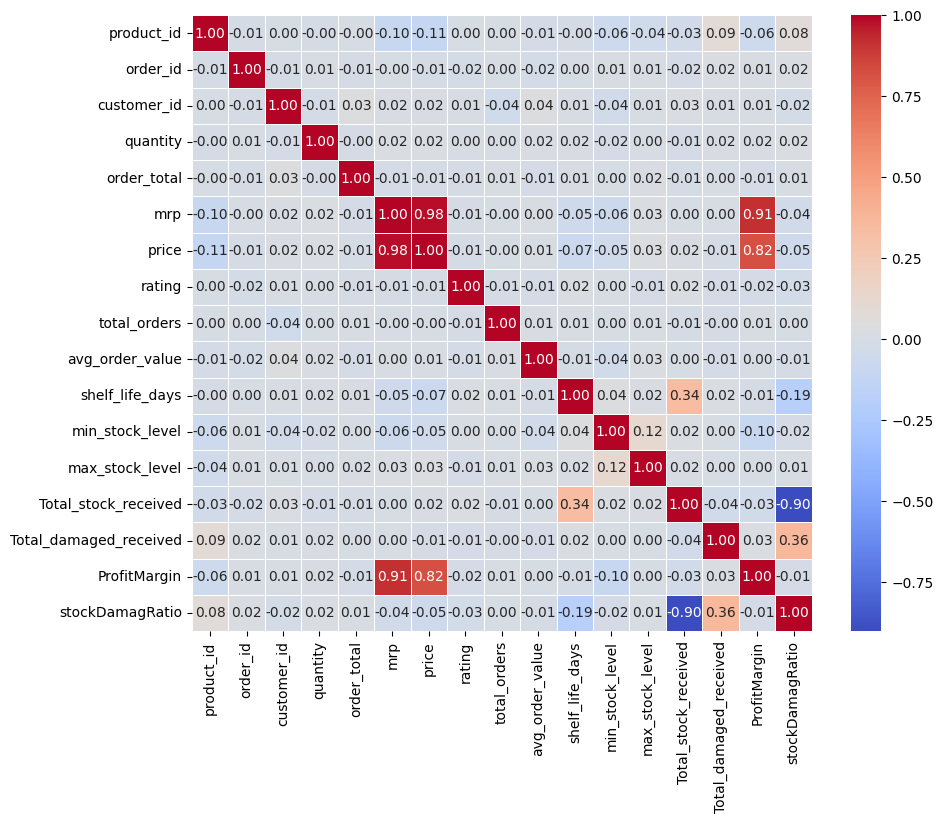

In [5]:
plt.figure(figsize=(10,8))
correation_matrix=df[numerical_col].corr()
sns.heatmap(correation_matrix,annot=True,fmt=".2f", cmap="coolwarm",linewidth=0.5)

In [6]:
df.columns

Index(['product_id', 'order_id', 'customer_id', 'customer_name',
       'product_name', 'registration_date', 'order_date', 'quantity',
       'order_total', 'category', 'brand', 'mrp', 'price', 'payment_method',
       'delivery_status', 'rating', 'feedback_category', 'sentiment',
       'customer_segment', 'total_orders', 'avg_order_value',
       'shelf_life_days', 'min_stock_level', 'max_stock_level',
       'Total_stock_received', 'Total_damaged_received', 'ProfitMargin',
       'stockDamagRatio'],
      dtype='object')

In [7]:
brand_performance=df.groupby('brand').agg({
    'order_total': 'sum',
    'ProfitMargin':'mean'}).sort_values(by='ProfitMargin', ascending=False)
brand_performance


,order_total,ProfitMargin
brand,,
Mammen-Hegde,54193.29,653.33
Banerjee Inc,23142.30,648.96
Kohli-Sawhney,24288.44,551.85
Bahl-Pau,39588.43,525.83
Som Inc,35680.47,512.83
...,...,...
"Arya, Sundaram and Pingle",31553.05,7.38
Toor-Nagar,37458.04,7.23
Deshpande-Rama,54833.82,6.67


In [8]:
low_sales_threashold = brand_performance['order_total'].quantile(0.15)

high_margin_threashold = brand_performance['ProfitMargin'].quantile(0.85)

low_sales_threashold

np.float64(31513.675)

In [9]:
high_margin_threashold

np.float64(362.387)

In [56]:
target_brand = brand_performance[
    (brand_performance['order_total'] <= low_sales_threashold) &
    (brand_performance['ProfitMargin'] >= high_margin_threashold)
]

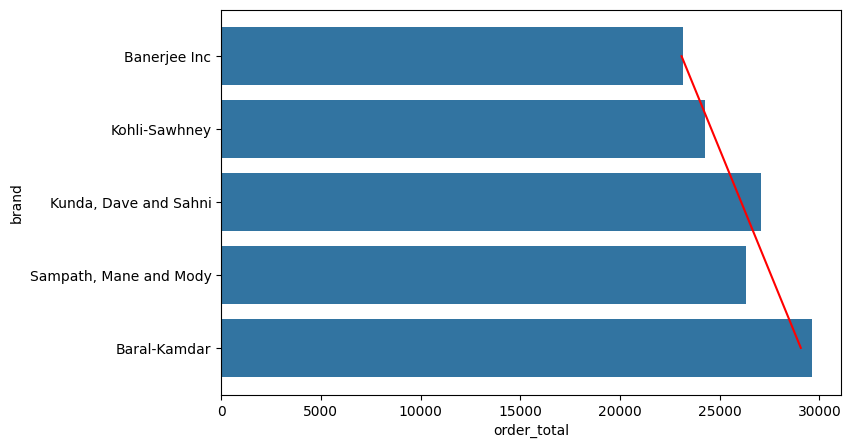

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x=target_brand['order_total'],y=target_brand.index)
x = np.arange(len(target_brand))
y = target_brand['order_total'].values

# Fit trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(p(x), target_brand.index, color='red')

plt.show()

In [12]:
print("brand with the low sales but high margin")
display(target_brand.sort_values('order_total'))

brand with the low sales but high margin


,order_total,ProfitMargin
brand,,
Banerjee Inc,23142.30,648.96
Kohli-Sawhney,24288.44,551.85
"Sampath, Mane and Mody",26297.97,439.59
"Kunda, Dave and Sahni",27057.78,444.88
Baral-Kamdar,29611.10,377.75


In [13]:
# brand_performance = brand_performance[brand_performance['order_total']<=10000]
# brand_performance

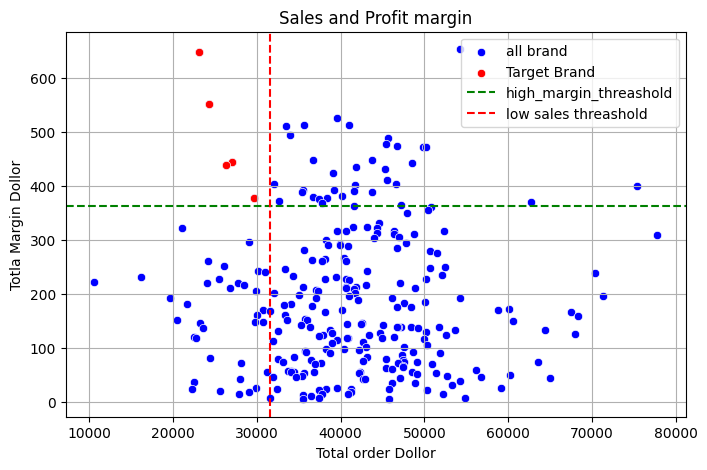

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=brand_performance,x='order_total',y='ProfitMargin',color='blue',label="all brand")
sns.scatterplot(data=target_brand,x='order_total',y='ProfitMargin',color='red',label='Target Brand')

plt.axhline(high_margin_threashold,linestyle='--',color='green',label='high_margin_threashold')
plt.axvline(low_sales_threashold,linestyle='--',color='red',label="low_sales_threashold")

plt.xlabel("Total order Dollor")
plt.ylabel('Totla Margin Dollor')
plt.legend()
plt.title('Sales and Profit margin')
plt.grid(True)
plt.show()

In [15]:
def format_dollor(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [16]:
top_category = df.groupby('category').agg({'order_total':'sum'}).nlargest(10,'order_total')

top_brands = df.groupby('brand').agg({'order_total':'sum'}).nlargest(10,'order_total')



In [17]:
top_category['order_total'].apply(lambda x: format_dollor(x))

category
Dairy & Breakfast          1.24M
Household Care             1.14M
Pet Care                   1.13M
Fruits & Vegetables        1.09M
Pharmacy                   1.06M
Snacks & Munchies          1.04M
Grocery & Staples          1.01M
Personal Care              1.00M
Cold Drinks & Juices     828.00K
Instant & Frozen Food    741.18K
Name: order_total, dtype: object

In [18]:
top_brands['order_total'].apply(lambda x: format_dollor(x))

brand
Mandal-Kar                 77.83K
Karnik PLC                 75.33K
Kurian-Chhabra             71.36K
Roy-Char                   70.37K
Basu and Sons              68.30K
Bahl, Jaggi and Nath       67.98K
Jha Group                  67.54K
Shroff, Wason and Dugar    65.02K
Batra, Sant and Mandal     64.40K
Morar-Mistry               63.59K
Name: order_total, dtype: object

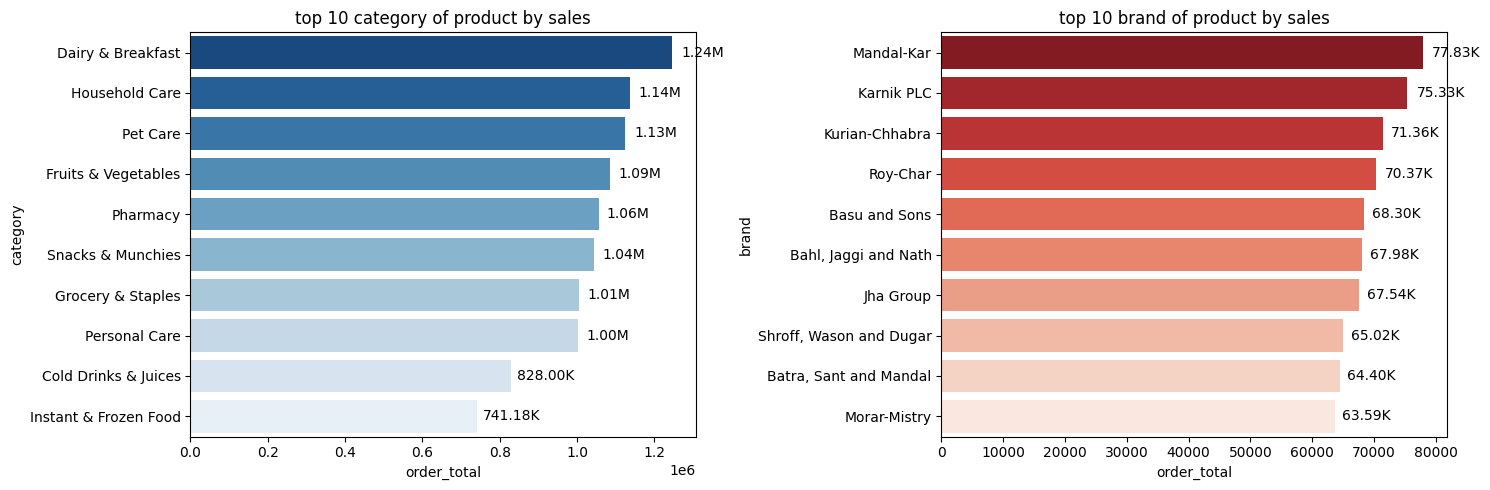

In [19]:
plt.figure(figsize=(15,5)) 

#Plot of top product Category 
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_category.index, x=top_category['order_total'],palette='Blues_r') 
plt.title("top 10 category of product by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollor(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black'
            )

#Plot for top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index, x=top_brands['order_total'],palette = 'Reds_r') 
plt.title("top 10 brand of product by sales") 

for bar in ax2.patches:
    ax2.text(bar.get_width()+ (bar.get_width()* 0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollor(bar.get_width()),
             ha='left', va = 'center', fontsize = 10, color = 'black'
            )

plt.tight_layout()
plt.show()

In [20]:
totalprofit=df.groupby('product_id').agg(
     TotalPurchasePrice=('price', 'sum'),
     TotalProfitMargin=('ProfitMargin','sum'),
     TotalSalesPrice=('mrp','sum'),
     TotalPurchaseQuantity=('quantity','sum')
    )
totalprofit


,TotalPurchasePrice,TotalProfitMargin,TotalSalesPrice,TotalPurchaseQuantity
product_id,,,,
4452,3907.24,1674.63,5581.87,39
6405,4257.18,1824.48,6081.66,34
9436,1857.03,1000.02,2857.05,44
11422,1907.40,635.85,2543.25,27
14145,13247.64,4415.88,17663.52,40
...,...,...,...,...
970529,17376.24,7447.02,24823.26,45
990993,4482.90,2413.83,6896.73,37
991434,4752.40,2559.00,7311.40,44


In [21]:
marg_table=pd.merge(
    totalprofit,
    df,
    on='product_id',
    how='inner'
)


In [22]:
# most contrubition category

category_performace=marg_table.groupby('category').agg({'TotalPurchasePrice':'sum',
                                        'TotalProfitMargin': 'sum',
                                        'TotalSalesPrice': 'sum'}).reset_index()

category_performace['PurchaseContribuation%']=((category_performace['TotalPurchasePrice'])/(category_performace['TotalPurchasePrice'].sum()))*100

category_performace=round(category_performace.sort_values("PurchaseContribuation%",ascending=False),2).sort_values(by='TotalPurchasePrice',ascending=False)


In [23]:
# top 10 category
top_category=category_performace.head(5)

top_category['TotalPurchasePrice']=top_category['TotalPurchasePrice'].apply(format_dollor)
top_category['TotalProfitMargin']=top_category['TotalProfitMargin'].apply(format_dollor)
top_category['TotalSalesPrice']=top_category['TotalSalesPrice'].apply(format_dollor)

top_category['CumulativeContribuation%']=top_category['PurchaseContribuation%'].cumsum()
top_category.head(5)

,category,TotalPurchasePrice,TotalProfitMargin,TotalSalesPrice,PurchaseContribuation%,CumulativeContribuation%
2,Dairy & Breakfast,6.60M,1.65M,8.25M,13.46,13.46
9,Pharmacy,6.20M,1.55M,7.75M,12.64,26.10
3,Fruits & Vegetables,5.56M,1.85M,7.42M,11.34,37.44
8,Pet Care,5.42M,2.92M,8.33M,11.05,48.49
5,Household Care,4.09M,1.36M,5.45M,8.34,56.83


<Figure size 800x600 with 0 Axes>

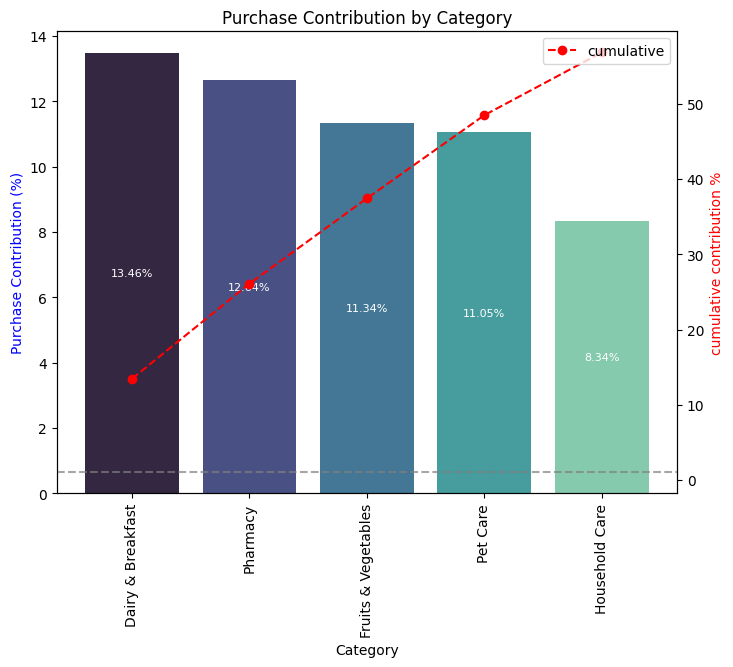

In [24]:
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots(figsize=(8,6))

# Bar plot
sns.barplot(x=top_category['category'], y=top_category['PurchaseContribuation%'], palette="mako", ax=ax1
)

# Add value labels on bars
for i, value in enumerate(top_category['PurchaseContribuation%']):
    ax1.text(i, value / 2, f"{value}%", ha='center', va='center', fontsize=8, color='white' )

# line plot
ax2=ax1.twinx()
ax2.plot(top_category['category'],top_category['CumulativeContribuation%'],color='red',marker='o',linestyle='dashed',label="cumulative")


ax1.set_xticklabels(top_category['category'],rotation=90)
ax1.set_ylabel("Purchase Contribution (%)",color='blue')
ax2.set_ylabel('cumulative contribution %',color='red')

ax1.set_xlabel("Category")
ax1.set_title("Purchase Contribution by Category")

# ax2.set_ylim(0,100)
ax2.axhline(y=1,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc="upper right")
plt.show()


In [25]:
# how much of the total procument is depedent on the top vendors
print(f"total category of top 10 category is{round(top_category['PurchaseContribuation%'].sum(),2)}%")

total category of top 10 category is56.83%


In [26]:
category=list(top_category['category'].values)
Purchase_contribution=(top_category['PurchaseContribuation%'].values)

In [27]:
total_contribution = sum(Purchase_contribution)
# remaning_contribution = 100-total_contribution


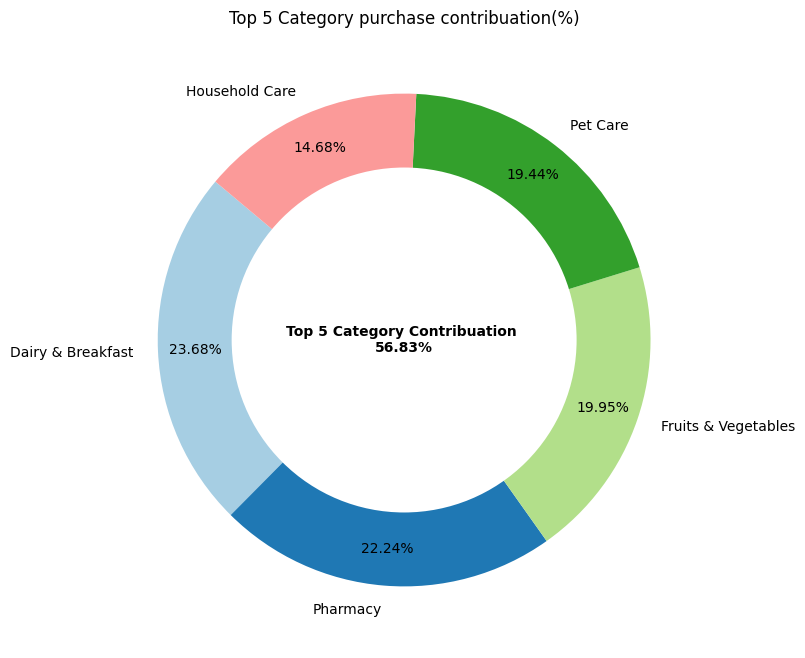

In [31]:
# Donut chart
fig,ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts= ax.pie(Purchase_contribution,labels=category,autopct='%1.2f%%',
startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

# Draw a white circle in the mid of the donut chart
center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.text(0,0,f"Top 5 Category Contribuation \n{total_contribution :.2f}%",fontsize=10,fontweight='bold',ha='center',va='center')

plt.title("Top 5 Category purchase contribuation(%)")
plt.show()

In [32]:
marg_table['unitPurchasePrice']=marg_table['TotalPurchasePrice']/marg_table['TotalPurchaseQuantity']


In [33]:
marg_table['OrderSize']=pd.qcut(marg_table['TotalPurchaseQuantity'],q=3,labels=['small','medium','large'])


In [34]:
marg_table.groupby('OrderSize')[['unitPurchasePrice']].mean()

,unitPurchasePrice
OrderSize,
small,252.623104
medium,228.885537
large,259.684849


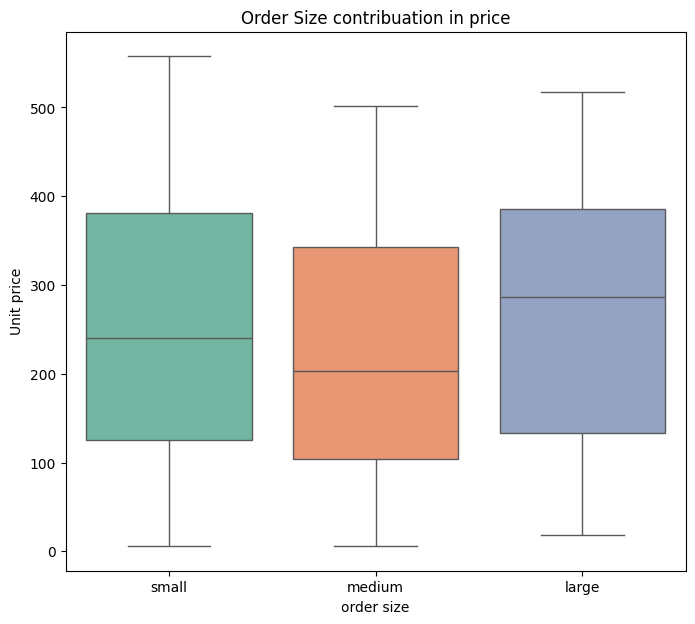

In [35]:
plt.figure(figsize=(8,7))
sns.boxplot(data = marg_table,y='unitPurchasePrice',x='OrderSize',palette='Set2')
plt.title('Order Size contribuation in price')
plt.xlabel('order size')
plt.ylabel('Unit price')
plt.show()

In [36]:
# df[df['quantity']<1].groupby('product_name')[['quantity']].mean().sort_values('quantity',ascending=True).head(10)

In [37]:
# so these is no any product that have quantity sols <0 no sold any product

In [38]:
# top 95% confidence interval for profit margin
top_threashold=marg_table['TotalSalesPrice'].quantile(0.75)
low_threashold=marg_table['TotalSalesPrice'].quantile(0.25)

top_category=marg_table[marg_table['TotalSalesPrice']>=top_threashold]['ProfitMargin'].dropna()
low_category=marg_table[marg_table['TotalSalesPrice']<=low_threashold]['ProfitMargin'].dropna()

top_category
low_category

0       72.81
1       72.81
2       72.81
3       72.81
4       72.81
        ...  
4995    18.08
4996    18.08
4997    18.08
4998    18.08
4999    18.08
Name: ProfitMargin, Length: 1259, dtype: float64

top category 95%  CI: (338.94,351.24),mean:345.09
low category 95%  CI: (46.65,50.34).mean:48.50


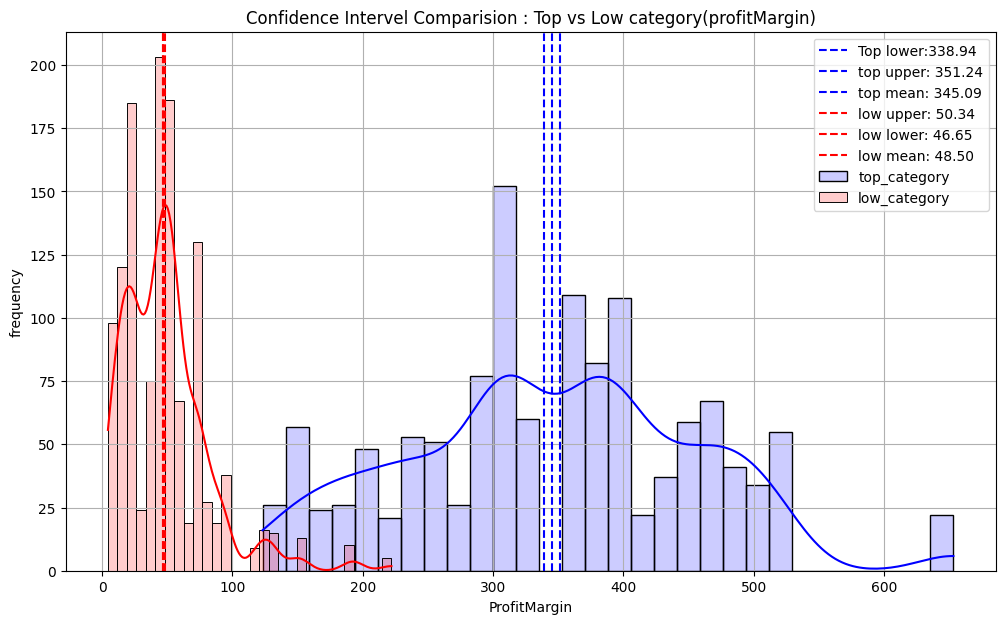

In [39]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1) / np.sqrt(len(data))
    t_critical=stats.t.ppf((1+confidence) / 2, df=len(data)-1)

    margin_of_error = t_critical * std_err
    return mean_val,mean_val-margin_of_error, mean_val+margin_of_error

top_mean, top_lower, top_upper=confidence_interval(top_category)
low_mean, low_lower, low_upper=confidence_interval(low_category)

print(f"top category 95%  CI: ({top_lower:.2f},{top_upper:.2f}),mean:{top_mean:.2f}")
print(f"low category 95%  CI: ({low_lower:.2f},{low_upper:.2f}).mean:{low_mean:.2f}")

plt.figure(figsize=(12,7))

# top category plot
sns.histplot(data=top_category,kde=True,color='blue',bins=30,alpha=0.2,label="top_category")
plt.axvline(top_lower,color='blue',linestyle='--',label=f"Top lower:{top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle='--',label=f"top upper: {top_upper:.2f}")
plt.axvline(top_mean,color='blue',linestyle='--' ,label=f"top mean: {top_mean:.2f}")

#low category plot
sns.histplot(data=low_category,kde=True,color="red",bins=30,alpha=0.2,label="low_category")
plt.axvline(low_lower,color='red',linestyle='--',label=f"low upper: {low_upper:.2f}")
plt.axvline(low_lower,color='red',linestyle='--',label=f"low lower: {low_lower:.2f}")
plt.axvline(low_mean,color='red',linestyle='--',label=f"low mean: {low_mean:.2f}")

plt.title("Confidence Intervel Comparision : Top vs Low category(profitMargin)")
plt.xlabel('ProfitMargin')
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
top_threashold=marg_table['TotalSalesPrice'].quantile(0.75)
low_threashold=marg_table['TotalSalesPrice'].quantile(0.25)

top_category=marg_table[marg_table['TotalSalesPrice']>=top_threashold]['ProfitMargin'].dropna()
low_category=marg_table[marg_table['TotalSalesPrice']<=low_threashold]['ProfitMargin'].dropna()

# perform two-sample t-test
t_stat, p_value =ttest_ind(top_category,low_category,equal_var=False)

print(f"T-statistic: {t_stat:.4f},p_value:{p_value:.4f}")
if p_value<0.05:
    print("Reject He: there is a significent differentce in profit margins between top and low_performing category")
else:
    print("Fall to reject He: No significent difference in profit margin")

T-statistic: 90.5988,p_value:0.0000
Reject He: there is a significent differentce in profit margins between top and low_performing category


In [41]:
tables=pd.read_sql_query("SELECT name from sqlite_master WHERE type='table'",conn)

In [42]:
tables

,name
0,blinkit_customers
1,blinkit_customer_feedback
2,blinkit_delivery_performance
3,blinkit_inventory
4,blinkit_inventoryNew
5,blinkit_marketing_performance
6,blinkit_orders
7,blinkit_order_items
8,blinkit_products
9,blinkit_sales_summary


In [43]:
df2=pd.read_sql("select * from blinkit_marketing_performance",conn)
df2.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

In [44]:
campaign_performance=df2.groupby('campaign_name').agg({'impressions':'sum'}).sort_values(by='impressions', ascending=False)
campaign_performance.head(5)

,impressions
campaign_name,
Membership Drive,3333717
Category Promotion,3323234
Festival Offer,3306651
Email Campaign,3292685
Weekend Special,3290521


In [45]:
campaign_performance['impressions'].apply(lambda x: format_dollor(x))

campaign_name
Membership Drive         3.33M
Category Promotion       3.32M
Festival Offer           3.31M
Email Campaign           3.29M
Weekend Special          3.29M
Referral Program         3.28M
New User Discount        3.27M
Flash Sale               3.26M
App Push Notification    3.13M
Name: impressions, dtype: object

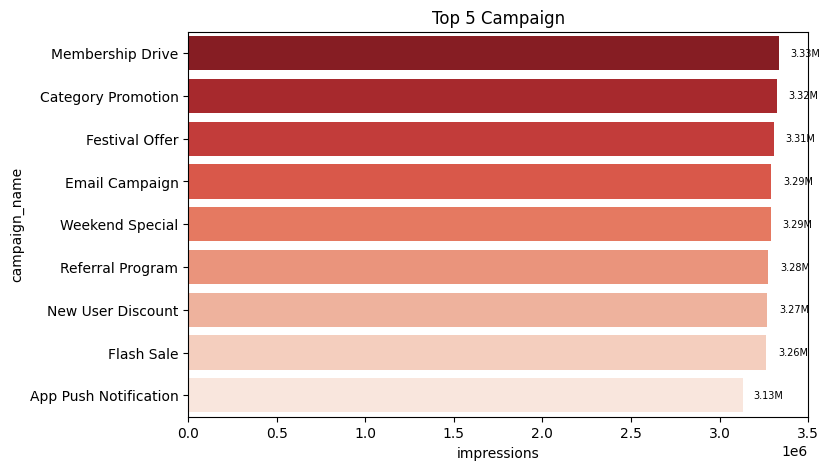

In [46]:
plt.figure(figsize=(8,5))
ax1=sns.barplot(campaign_performance,x='impressions',y='campaign_name',palette="Reds_r")
plt.title("Top 5 Campaign")

for bar in ax1.patches:
    ax1.text(bar.get_width()+ (bar.get_width()* 0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollor(bar.get_width()),
             ha='left', va = 'center', fontsize = 7, color = 'black'
            )
plt.show()

In [47]:
channel_performance=df2.groupby('channel').agg({'impressions': 'sum'}).sort_values(by='impressions',ascending=False)
channel_performance['impressions'].apply(lambda x: format_dollor(x))

channel
App             7.56M
SMS             7.37M
Social Media    7.28M
Email           7.28M
Name: impressions, dtype: object

In [48]:
impressions_per=channel_performance['impressions'].values
channel=list(channel_performance.index.values)
channel


['App', 'SMS', 'Social Media', 'Email']

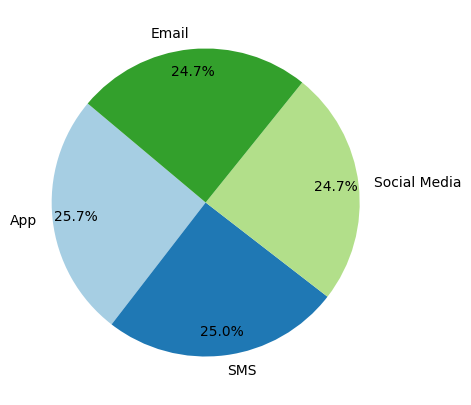

In [49]:
fig,ax = plt.subplots(figsize=(8,5))
weight=ax.pie(impressions_per,autopct='%1.1f%%',labels=channel,pctdistance=0.85,startangle=140,
                                                                                   colors=plt.cm.Paired.colors)
plt.show()

In [50]:
camp_roas=df2.groupby('campaign_name').agg({'roas': 'mean'}).sort_values(by='roas',ascending=False)
camp_roas.head(5)

,roas
campaign_name,
Email Campaign,2.777067
Festival Offer,2.765917
App Push Notification,2.760817
New User Discount,2.754950
Referral Program,2.743450


In [51]:
camp_roas=df2.groupby('target_audience').agg({'roas': 'mean'}).sort_values(by='roas',ascending=False)
camp_roas.head(5)

,roas
target_audience,
All,2.766572
New Users,2.753370
Premium,2.742103
Inactive,2.700802


In [52]:
camp_imp_click=df2.groupby('campaign_name').agg({'impressions':'sum',
                                                 'clicks':'sum',
                                                 'conversions':'sum',
                                                 'revenue_generated':'sum',
                                                  }).sort_values(by='conversions', ascending=False)
camp_imp_click['click_percentage']=(camp_imp_click['clicks'])/(camp_imp_click['impressions'])*100
camp_imp_click['conversions_percentage']=(camp_imp_click['conversions'])/(camp_imp_click['clicks'])*100
camp_imp_click

,impressions,clicks,conversions,revenue_generated,click_percentage,conversions_percentage
campaign_name,,,,,,
New User Discount,3270347,332400,33964,3603860.17,10.164059,10.217810
Category Promotion,3323234,329690,33568,3582455.37,9.920758,10.181686
Referral Program,3276426,329302,33490,3691382.60,10.050647,10.169996
Weekend Special,3290521,323668,33271,3571451.83,9.836375,10.279360
Flash Sale,3264022,332882,33211,3556087.02,10.198522,9.976809
App Push Notification,3130007,325833,32783,3554370.00,10.409977,10.061289
Festival Offer,3306651,325928,32765,3507063.91,9.856740,10.052834
Membership Drive,3333717,335842,32550,3524951.25,10.074100,9.692058
Email Campaign,3292685,338600,32436,3601785.22,10.283401,9.579445


In [53]:
low_impression_threashold=camp_imp_click['impressions'].quantile(0.15)
high_revenue_threashold=camp_imp_click['revenue_generated'].quantile(0.85)
low_impression_threashold

np.float64(3265287.0)

In [54]:
high_revenue_threashold

np.float64(3603445.18)

In [55]:
target_campagin=camp_imp_click[
    (camp_imp_click['impressions']<=low_impression_threashold) |
    (camp_imp_click['revenue_generated']>=high_revenue_threashold)
    ]
target_campagin

,impressions,clicks,conversions,revenue_generated,click_percentage,conversions_percentage
campaign_name,,,,,,
New User Discount,3270347,332400,33964,3603860.17,10.164059,10.217810
Referral Program,3276426,329302,33490,3691382.60,10.050647,10.169996
Flash Sale,3264022,332882,33211,3556087.02,10.198522,9.976809
App Push Notification,3130007,325833,32783,3554370.00,10.409977,10.061289
